In [1]:
# Implementing SVC -->
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
X1 = np.array([[1,5], [2,3],[3,7],[4,1],[5,7],[6,2],[7,6],[8,4]])

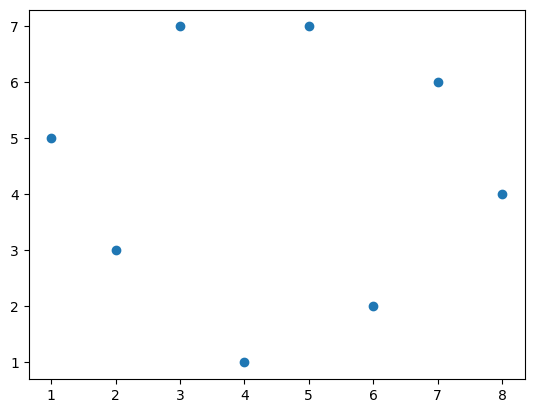

In [2]:
plt.scatter(X1[:,0],X1[:,1])
plt.show()

In [3]:
D1 = np.array([[-7,0],[-6,0],[-5,0],[-4,0],[4,0],[5,0],[6,0],[7,0]]) # Category 1 data(Class 1) and y-axis data is constant

In [4]:
D2 = np.array([[-3,0],[-2,0],[-1,0],[0,0],[1,0],[2,0],[3,0]]) # Category 2 data(Class 2) [-3,0] --> -3 --> x-coordinate and 0--> y-coordinate

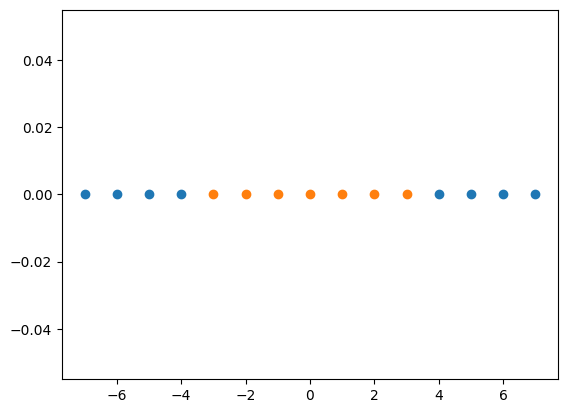

In [5]:
plt.scatter(D1[:,0],D1[:,1])
plt.scatter(D2[:,0],D2[:,1])

In [6]:
# Building a kernal function --
a,b = D1[:,0],D1[:,1]
c,d = D2[:,0],D2[:,1]

In [7]:
dff1 = pd.DataFrame(np.vstack([a,b]).T,columns=['X1','X2']) # vertical stack (Creating different dataframes for each classes)
dff1['Y']=0 # Y variable is the dependent or output variable representing a class 0
dff1 # X-coordinate of D1 stores in X1 column and Y-coordinate of D1 stores X2 column.

,X1,X2,Y
0,-7,0,0
1,-6,0,0
2,-5,0,0
3,-4,0,0
4,4,0,0
5,5,0,0
6,6,0,0
7,7,0,0


In [8]:
dff2 = pd.DataFrame(np.vstack([c,d]).T,columns=['X1','X2'])
dff2['Y'] = 1 # representing a class 1 
dff2

,X1,X2,Y
0,-3,0,1
1,-2,0,1
2,-1,0,1
3,0,0,1
4,1,0,1
5,2,0,1
6,3,0,1


In [11]:
#final = dff1.concat(dff2)
final = pd.concat([dff1, dff2], ignore_index=True)

In [12]:
final

,X1,X2,Y
0,-7,0,0
1,-6,0,0
2,-5,0,0
3,-4,0,0
4,4,0,0
5,5,0,0
6,6,0,0
7,7,0,0
8,-3,0,1
9,-2,0,1


In [13]:
# Applying kernal function - (Linear function)
final['X1_Square'] =final['X1']**2 
final 

,X1,X2,Y,X1_Square
0,-7,0,0,49
1,-6,0,0,36
2,-5,0,0,25
3,-4,0,0,16
4,4,0,0,16
5,5,0,0,25
6,6,0,0,36
7,7,0,0,49
8,-3,0,1,9
9,-2,0,1,4


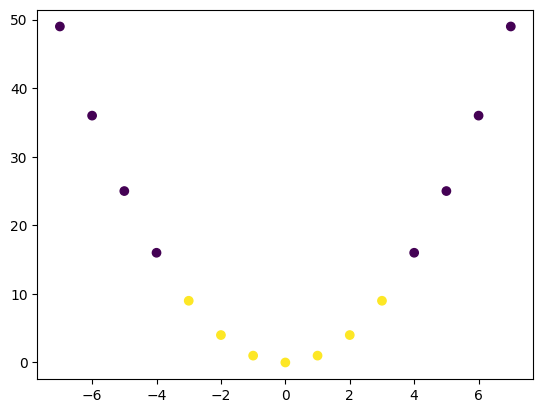

In [14]:
plt.scatter(final['X1'],final['X1_Square'],c=final['Y'])

In [18]:
import plotly.express as px
fig = px.scatter_3d(final, x='X1_Square', y='X1', z='Y',
              color='Y')
fig.show()

In [19]:
# Implementing Polynomial Regression - 
X1 = np.array([[1,5],[2,3],[3,7],[4,1],[5,7],[6,2],[7,6],[8,4]])

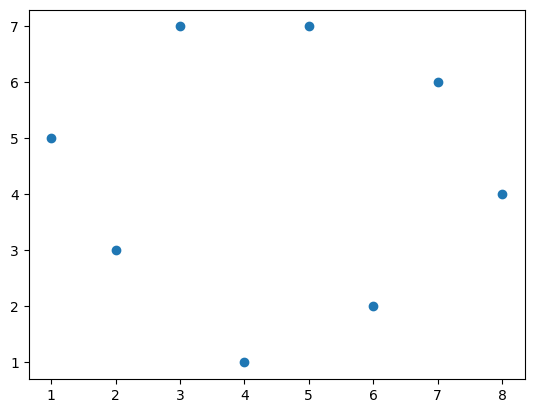

In [20]:
plt.scatter(X1[:,0],X1[:,1])
plt.show()

In [21]:
X2 = np.array([[3,3], [4,4],[5,5],[3,4],[4,5]])

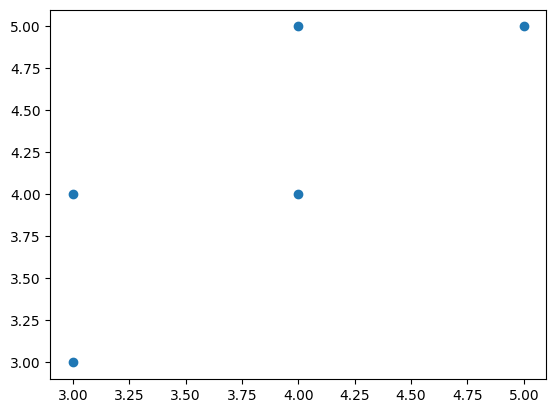

In [22]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

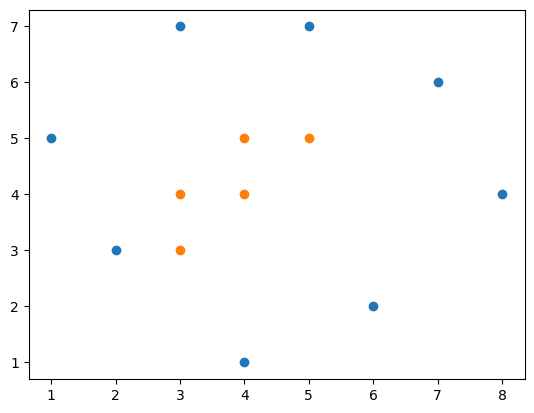

In [23]:
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])

In [24]:
x,y=X1[:,0],X1[:,1]

In [25]:
u,v=X2[:,0],X2[:,1]

In [26]:
df1 =pd.DataFrame(np.vstack([x,y]).T,columns=['X1','X2'])
df1['Y']=0
df1

,X1,X2,Y
0,1,5,0
1,2,3,0
2,3,7,0
3,4,1,0
4,5,7,0
5,6,2,0
6,7,6,0
7,8,4,0


In [27]:
df2 =pd.DataFrame(np.vstack([u,v]).T,columns=['X1','X2'])
df2['Y']=1
df2

,X1,X2,Y
0,3,3,1
1,4,4,1
2,5,5,1
3,3,4,1
4,4,5,1


In [28]:
dff = pd.concat([df1, df2], ignore_index=True)

In [29]:
dff

,X1,X2,Y
0,1,5,0
1,2,3,0
2,3,7,0
3,4,1,0
4,5,7,0
5,6,2,0
6,7,6,0
7,8,4,0
8,3,3,1
9,4,4,1


In [31]:
x = dff[['X1','X2']]
y = dff['Y']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [33]:
from sklearn.svm import SVC

In [34]:
clff = SVC(kernel="linear")
clff.fit(x,y)

SVC(kernel='linear')

In [35]:
clff.score(X_test,Y_test) # 50% percent prediction

0.5

In [36]:
# Now to improve accuracy of the model we need to implement kernel function -
dff['X1_S'] = dff['X1']**2
dff['X2_S'] = dff['X2']**2
dff['X1X2'] = dff['X1']*dff['X2']

In [37]:
dff

,X1,X2,Y,X1_S,X2_S,X1X2
0,1,5,0,1,25,5
1,2,3,0,4,9,6
2,3,7,0,9,49,21
3,4,1,0,16,1,4
4,5,7,0,25,49,35
5,6,2,0,36,4,12
6,7,6,0,49,36,42
7,8,4,0,64,16,32
8,3,3,1,9,9,9
9,4,4,1,16,16,16


In [38]:
x = dff[['X1','X2','X1_S','X2_S','X1X2']]
y = dff['Y']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [40]:
from sklearn.svm import SVC
clff = SVC(kernel="linear")
clff.fit(x,y)
clff.score(X_test,Y_test)

1.0

In [41]:
from sklearn.svm import SVC
clffp = SVC(kernel = "poly")
clffp.fit(x,y)
clffp.score(X_test,Y_test)

1.0

In [42]:
import plotly.express as px
fig = px.scatter_3d(dff, x='X1', y='X2', z='Y',
              color='Y')
fig.show()

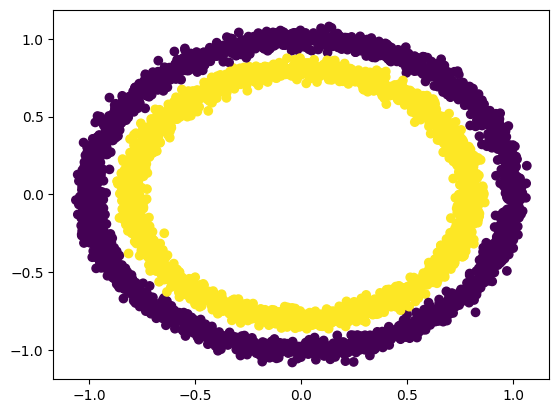

In [43]:
# Implementing RBF kernel --
from sklearn.datasets import make_circles
x, y = make_circles(n_samples=5000,random_state=0,noise=0.03)
plt.scatter(x[:,0],x[:,1],c=y)

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf1 = SVC(kernel="linear")
clf1.fit(x, y)

SVC(kernel='linear')

In [45]:
pred = clf1.predict(x)
accuracy_score(pred, y)

0.505

In [46]:
clf2 = SVC(kernel="poly")
clf2.fit(x, y)
pred = clf2.predict(x)
accuracy_score(pred, y)

0.5626

In [47]:
clf3 = SVC(kernel="rbf")
clf3.fit(x, y)
pred = clf3.predict(x)
accuracy_score(pred, y)

0.9998

In [48]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y, pred)
confusion_matrix

array([[2500,    0],
       [   1, 2499]], dtype=int64)

In [49]:
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = clf3.classes_)

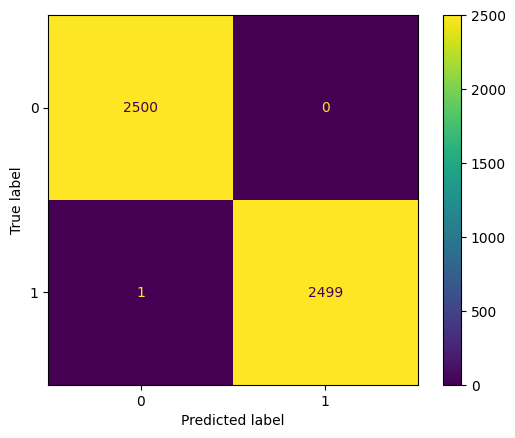

In [50]:
cm.plot()

In [51]:
# Implementing a Support Vector Regression - 
A = np.array([[1,10],[2,8],[3,6],[4,4],[5,6],[6,8],[7,10]])

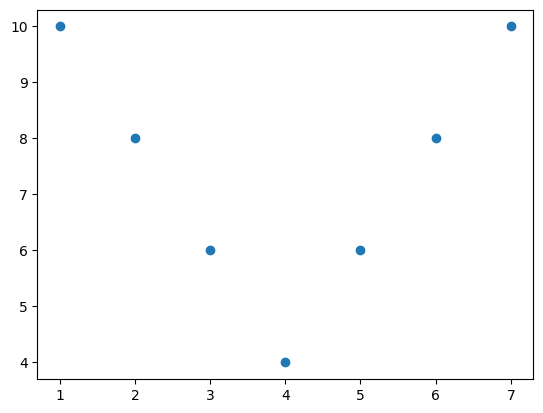

In [52]:
plt.scatter(A[:,0],A[:,1])
plt.show()

In [53]:
x = A[:,0]
y = A[:,1]

In [54]:
x = x.reshape(-1,1)

In [55]:
from sklearn.svm import SVR 
svr = SVR(kernel='linear') 
svr.fit(x, y)

SVR(kernel='linear')

In [56]:
y_pred = svr.predict(x) 

-0.052355769230769234

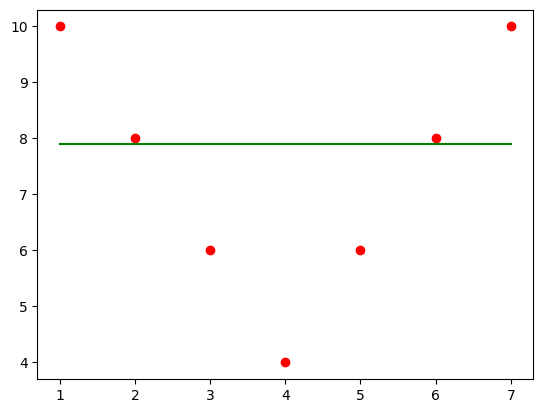

In [57]:
plt.scatter(x, y, color='red') 
plt.plot(x, y_pred, color='green')  # Model is of no use as the accuracy is not good.
svr.score(x,y)

0.0012883918207801104

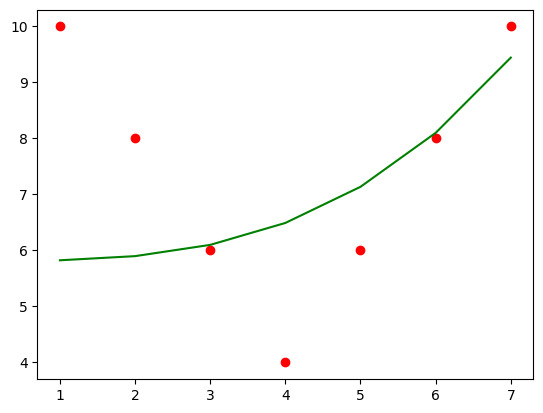

In [58]:
svr = SVR(kernel='poly') 
svr.fit(x, y)
y_pred = svr.predict(x) 
plt.scatter(x, y, color='red') 
plt.plot(x, y_pred, color='green')  
svr.score(x,y)

0.7567512784553276

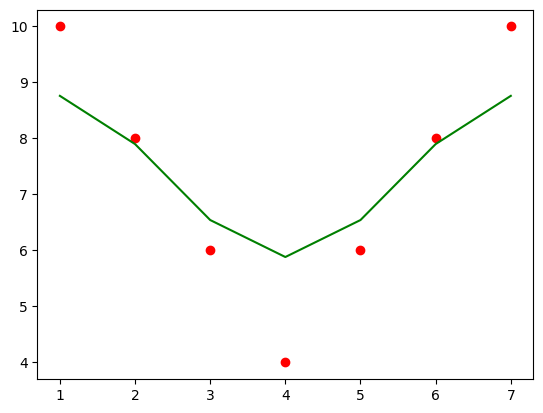

In [59]:
svr = SVR(kernel='rbf') 
svr.fit(x, y)
y_pred = svr.predict(x)  # Accuracy is slightly increase from linear kernal function to rbf function
plt.scatter(x, y, color='red') 
plt.plot(x, y_pred, color='green')  
svr.score(x,y)

0.9790209790209793

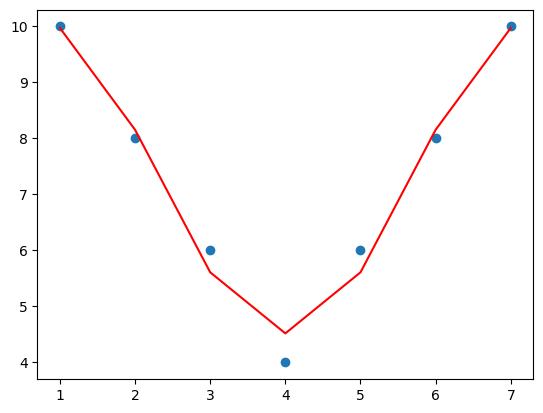

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=4)
poly_x = poly.fit_transform(x.reshape(-1, 1))
model1 = LinearRegression()
model1.fit(poly_x, y)
y_pred = model1.predict(poly_x)
plt.scatter(x, y)
plt.plot(x, y_pred, c='red')
model1.score(poly_x,y)